<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/PCP_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [ ]:
file_path = '/content/drive/MyDrive/Data/Saint Martin Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Physiochemical Parameters')

In [ ]:
shape_larger_area = gpd.read_file('/content/drive/MyDrive/Data/2021/Total_area_2021.shp')

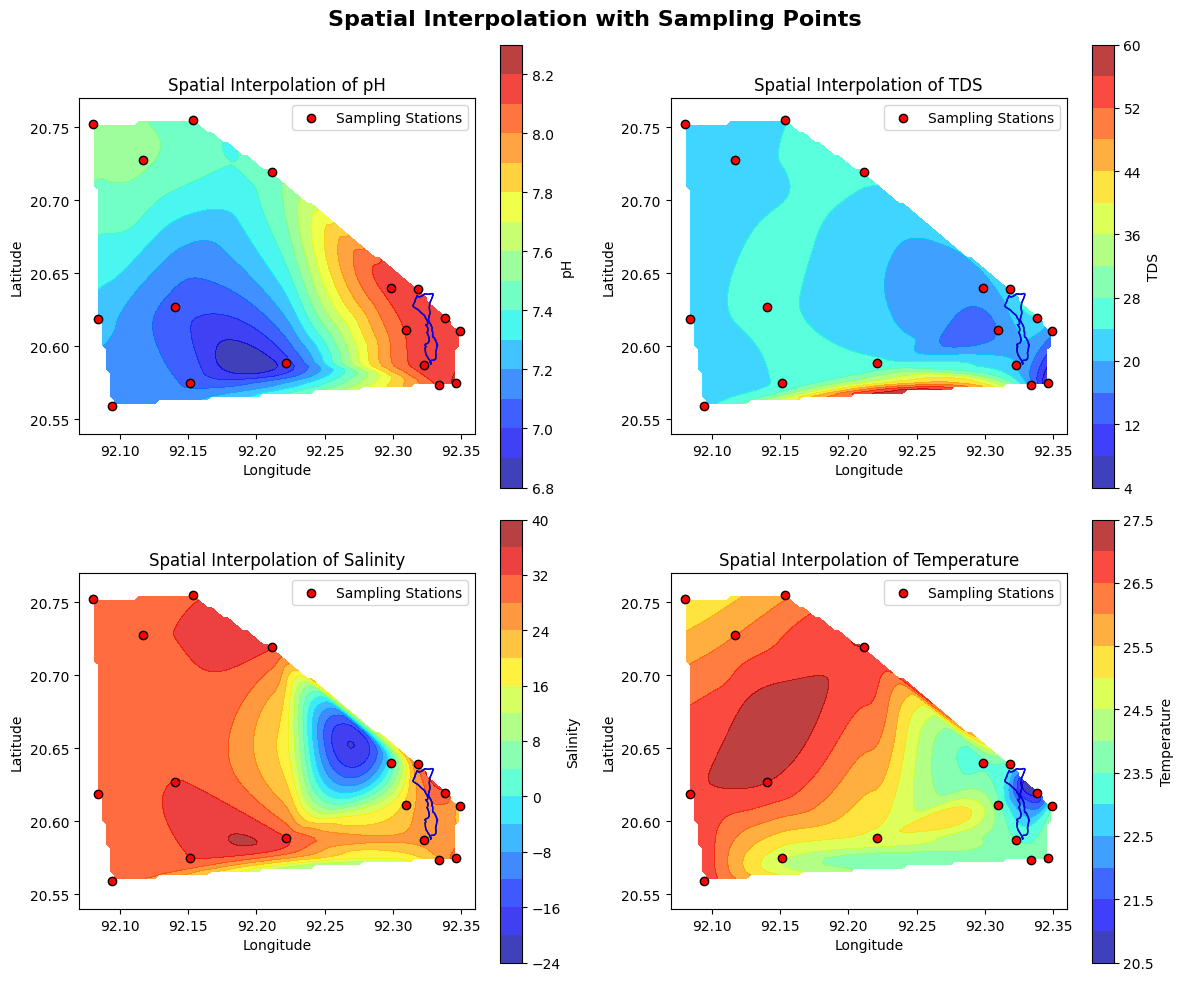

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop through each parameter and plot
for i, parameter in enumerate(parameters):
    ax = axs[i // 2, i % 2]  # Determine subplot position
    points = df[['Longitude', 'Latitude']].values
    grid_z = griddata(points, df[parameter].values, (grid_x, grid_y), method='cubic')
    grid_z = np.ma.masked_invalid(grid_z)

    contour = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap='jet', alpha=0.75)

    # Plot boundaries of the larger and smaller shapefiles
    shape_larger_area.boundary.plot(ax=ax, color='black', linewidth=1)
    shape_smaller_area.boundary.plot(ax=ax, color='blue', linewidth=1)

    # Plot sampling points
    ax.scatter(df['Longitude'], df['Latitude'], c='red', label='Sampling Stations', edgecolor='k', zorder=5)

    # Add titles and labels
    ax.set_title(f'Spatial Interpolation of {parameter}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.colorbar(contour, ax=ax, label=parameter)
    ax.legend(loc='upper right')

fig.suptitle('Spatial Interpolation with Sampling Points', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()